Integrantes: 
- Juan David Cepeda Bogota
- Julian Mondragon
- Manuel Rodriguez

# Implementacion

## Grover

In [36]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import transpile
from qiskit.circuit.library import QFT
import numpy as np
from qiskit_aer import AerSimulator
from condor_oracle import build_Uf_condor, N_CONFIG_BITS

In [37]:
simulador = AerSimulator(method = 'statevector')

In [38]:
qr = QuantumRegister(N_CONFIG_BITS + 1)
cr = ClassicalRegister(N_CONFIG_BITS)
circuito = QuantumCircuit(qr, cr)

In [39]:
Uf_condor = build_Uf_condor()

In [ ]:
for i in range(N_CONFIG_BITS):
    if i==3 or i==8 or i==11:
        pass
    else:
        circuito.h(i)

In [41]:
def phase_oracle_from_query(Uf_condor: QuantumCircuit) -> QuantumCircuit:
    """
    Given an (n+1)-qubit query oracle Uf implementing
        |x, y> -> |x, y ⊕ f(x)>,
    build a circuit that realises the phase oracle

        Z_f : |x> -> (-1)^{f(x)} |x>

    using the phase kickback trick with the (n-th) ancilla qubit.
    The ancilla is prepared in |-> and returned to |-> afterwards.
    """

    n_plus_1 = Uf_condor.num_qubits
    anc = n_plus_1 - 1

    qc = QuantumCircuit(n_plus_1, name="Z_f_from_Uf")

    # Prepare ancilla in |-> from |0>:  X |0> = |1>, then H|1> = |->.
    qc.x(anc)
    qc.h(anc)

    qc.compose(Uf_condor, inplace=True)

    # Unprepare ancilla: H then X (inverse of what we did)
    qc.h(anc)
    qc.x(anc)

    return qc


In [42]:
circuito.append(phase_oracle_from_query(Uf_condor).to_gate(), range(N_CONFIG_BITS + 1))

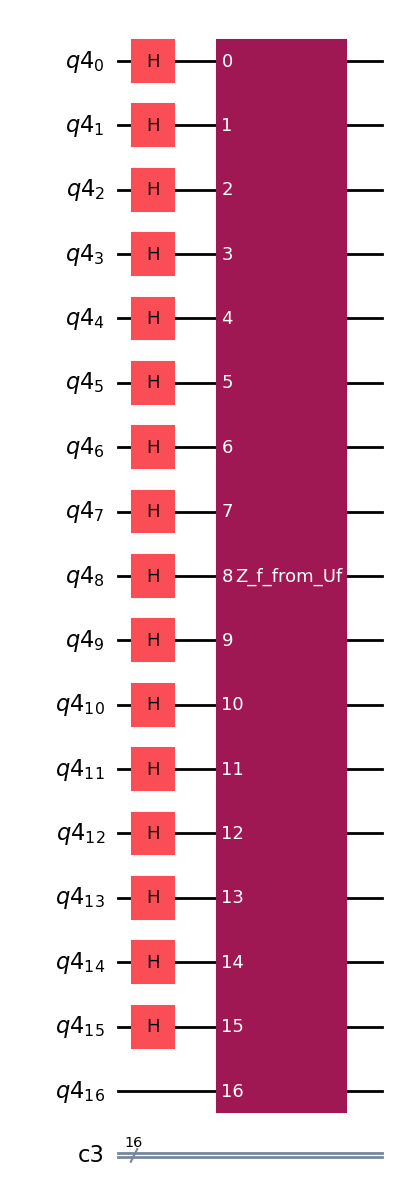

In [43]:
circuito.draw('mpl')

In [ ]:
circuito.h(range(N_CONFIG_BITS+1))

In [ ]:
circuito.x(range(N_CONFIG_BITS+1))

In [45]:
def mcz(circuit, control_qubits, target_qubit):
    circuit.h(target_qubit)
    circuit.mcx(control_qubits, target_qubit) 
    circuit.h(target_qubit)

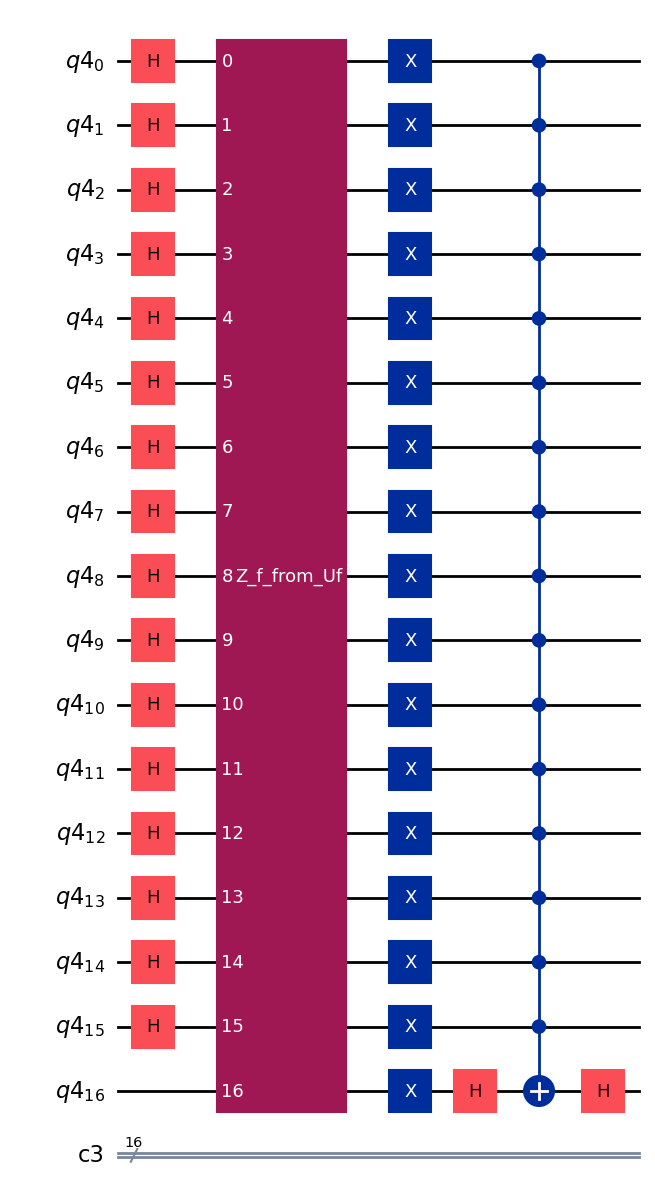

In [46]:
mcz(circuito, qr[:N_CONFIG_BITS], qr[N_CONFIG_BITS])
circuito.draw('mpl')

In [47]:
circuito.x(range(N_CONFIG_BITS+1))

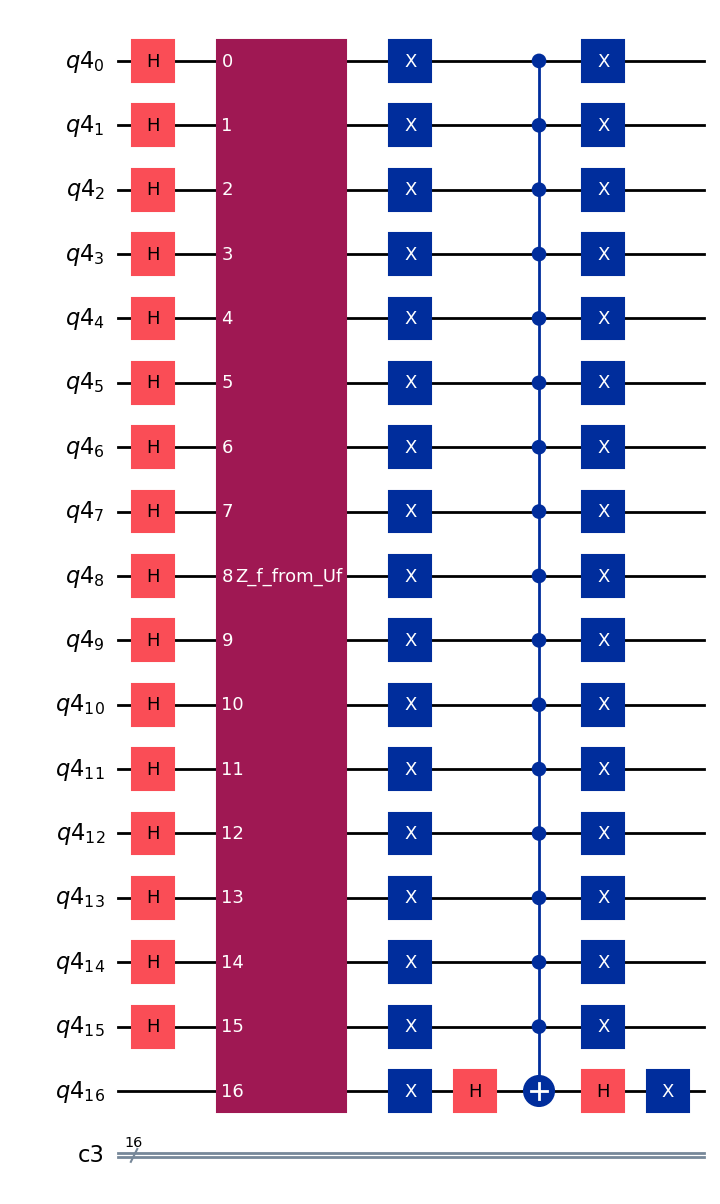

In [48]:
circuito.draw('mpl')